# An attempt to find out if any nationalities have preference for a particular genre

In [211]:
import sqlite3
import pandas as pd

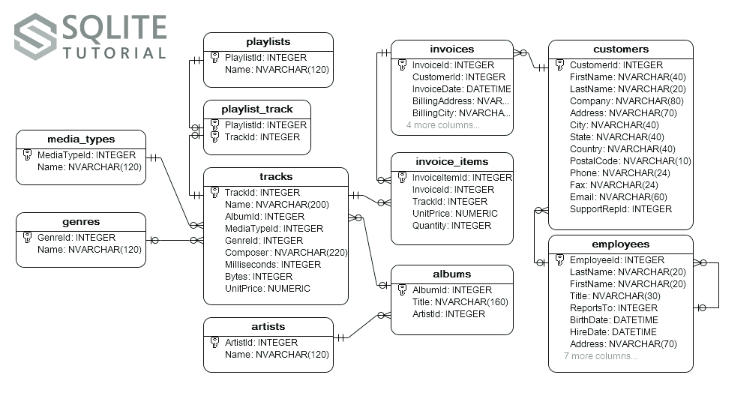

In [212]:
#establishing connection
connection = sqlite3.connect("chinook.db")
cur = connection.cursor()

## A look at customers table

In [213]:
#creating pandas df from customers table
query = 'SELECT * FROM customers'
customers = pd.read_sql_query(query, connection)
customers.head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [214]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerId    59 non-null     int64 
 1   FirstName     59 non-null     object
 2   LastName      59 non-null     object
 3   Company       10 non-null     object
 4   Address       59 non-null     object
 5   City          59 non-null     object
 6   State         30 non-null     object
 7   Country       59 non-null     object
 8   PostalCode    55 non-null     object
 9   Phone         58 non-null     object
 10  Fax           12 non-null     object
 11  Email         59 non-null     object
 12  SupportRepId  59 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.1+ KB


In [215]:
customers.shape

(59, 13)

In [216]:
cust_columns = customers.columns.tolist() 
cust_columns

['CustomerId',
 'FirstName',
 'LastName',
 'Company',
 'Address',
 'City',
 'State',
 'Country',
 'PostalCode',
 'Phone',
 'Fax',
 'Email',
 'SupportRepId']

In [217]:
#checking for nans
customers.isna().sum()

CustomerId       0
FirstName        0
LastName         0
Company         49
Address          0
City             0
State           29
Country          0
PostalCode       4
Phone            1
Fax             47
Email            0
SupportRepId     0
dtype: int64

In [218]:
#checking with how many countries we'll be dealing
customers['Country'].unique()

array(['Brazil', 'Germany', 'Canada', 'Norway', 'Czech Republic',
       'Austria', 'Belgium', 'Denmark', 'USA', 'Portugal', 'France',
       'Finland', 'Hungary', 'Ireland', 'Italy', 'Netherlands', 'Poland',
       'Spain', 'Sweden', 'United Kingdom', 'Australia', 'Argentina',
       'Chile', 'India'], dtype=object)

In [219]:
len(customers['Country'].unique())

24

In [220]:
#checking if any country is prevailing
customers['Country'].groupby(by=customers['Country']).count()

Country
Argentina          1
Australia          1
Austria            1
Belgium            1
Brazil             5
Canada             8
Chile              1
Czech Republic     2
Denmark            1
Finland            1
France             5
Germany            4
Hungary            1
India              2
Ireland            1
Italy              1
Netherlands        1
Norway             1
Poland             1
Portugal           2
Spain              1
Sweden             1
USA               13
United Kingdom     3
Name: Country, dtype: int64

## A look at the genres table

In [221]:
query2 = 'SELECT * FROM genres'
genres = pd.read_sql_query(query2, connection)
genres

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


In [222]:
genres.shape

(25, 2)

In [223]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   GenreId  25 non-null     int64 
 1   Name     25 non-null     object
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


## Creating a Dataframe containing only Customer country and the genre

In [224]:
#getting genres and customers' residency based on invoices data
query3 = 'SELECT * FROM invoice_items AS it LEFT JOIN tracks AS t ON it.TrackId = t.TrackId LEFT JOIN genres AS g ON g.GenreId = t.GenreId LEFT JOIN invoices AS i ON it.InvoiceId = i.InvoiceId LEFT JOIN customers AS cust ON cust.CustomerId = i.CustomerID'
genres = pd.read_sql_query(query3, connection)
genres

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity,TrackId,Name,AlbumId,MediaTypeId,GenreId,...,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,1,2,0.99,1,2,Balls to the Wall,2,2,1,...,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
1,2,1,4,0.99,1,4,Restless and Wild,3,2,1,...,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,2,6,0.99,1,6,Put The Finger On You,1,1,1,...,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
3,4,2,8,0.99,1,8,Inject The Venom,1,1,1,...,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,2,10,0.99,1,10,Evil Walks,1,1,1,...,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2236,411,3136,0.99,1,3136,Looking For Love,141,1,3,...,None,Porthaninkatu 9,Helsinki,None,Finland,00530,+358 09 870 2000,None,terhi.hamalainen@apple.fi,3
2236,2237,411,3145,0.99,1,3145,Sweet Lady Luck,141,1,3,...,None,Porthaninkatu 9,Helsinki,None,Finland,00530,+358 09 870 2000,None,terhi.hamalainen@apple.fi,3
2237,2238,411,3154,0.99,1,3154,Feirinha da Pavuna/Luz do Repente/Bagaço da La...,248,1,7,...,None,Porthaninkatu 9,Helsinki,None,Finland,00530,+358 09 870 2000,None,terhi.hamalainen@apple.fi,3
2238,2239,411,3163,0.99,1,3163,Samba pras moças,248,1,7,...,None,Porthaninkatu 9,Helsinki,None,Finland,00530,+358 09 870 2000,None,terhi.hamalainen@apple.fi,3


In [225]:
#closing connection
connection.close()

In [226]:
#checking what columns have null values
genres.isna().sum()

InvoiceLineId           0
InvoiceId               0
TrackId                 0
UnitPrice               0
Quantity                0
TrackId                 0
Name                    0
AlbumId                 0
MediaTypeId             0
GenreId                 0
Composer              596
Milliseconds            0
Bytes                   0
UnitPrice               0
GenreId                 0
Name                    0
InvoiceId               0
CustomerId              0
InvoiceDate             0
BillingAddress          0
BillingCity             0
BillingState         1100
BillingCountry          0
BillingPostalCode     152
Total                   0
CustomerId              0
FirstName               0
LastName                0
Company              1860
Address                 0
City                    0
State                1100
Country                 0
PostalCode            152
Phone                  38
Fax                  1784
Email                   0
SupportRepId            0
dtype: int64

In [227]:
genres.shape

(2240, 38)

In [228]:
#taking only the columns that are required for this analysis
df = genres[['Country','Name']]
df

,Country,Name,Name
0,Germany,Balls to the Wall,Rock
1,Germany,Restless and Wild,Rock
2,Norway,Put The Finger On You,Rock
3,Norway,Inject The Venom,Rock
4,Norway,Evil Walks,Rock
...,...,...,...
2235,Finland,Looking For Love,Metal
2236,Finland,Sweet Lady Luck,Metal
2237,Finland,Feirinha da Pavuna/Luz do Repente/Bagaço da La...,Latin
2238,Finland,Samba pras moças,Latin


In [229]:
df.shape

(2240, 3)

In [230]:
df.isna().sum()

Country    0
Name       0
Name       0
dtype: int64

In [231]:
#renaming columns
df.columns = ['country', 'song_name', 'genre_name']
df

,country,song_name,genre_name
0,Germany,Balls to the Wall,Rock
1,Germany,Restless and Wild,Rock
2,Norway,Put The Finger On You,Rock
3,Norway,Inject The Venom,Rock
4,Norway,Evil Walks,Rock
...,...,...,...
2235,Finland,Looking For Love,Metal
2236,Finland,Sweet Lady Luck,Metal
2237,Finland,Feirinha da Pavuna/Luz do Repente/Bagaço da La...,Latin
2238,Finland,Samba pras moças,Latin


In [232]:
df.drop(columns='song_name', inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [233]:
df

,country,genre_name
0,Germany,Rock
1,Germany,Rock
2,Norway,Rock
3,Norway,Rock
4,Norway,Rock
...,...,...
2235,Finland,Metal
2236,Finland,Metal
2237,Finland,Latin
2238,Finland,Latin


## Further exploration

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     2240 non-null   object
 1   genre_name  2240 non-null   object
dtypes: object(2)
memory usage: 35.1+ KB


In [235]:
#checking for unique countries and genres
def un_countr_genres(df):
    countries = df['country'].unique()
    genres = df['genre_name'].unique()
    print("There are {} unique countries\n***********".format(len(countries)))
    print("\nPrinting countries:\n")
    for i in sorted(countries):
        print(i)
    print("\nThere are {} unique genres\n***********".format(len(genres)))
    print("\nPrinting genres:\n")
    for i in sorted(genres):
        print(i)

In [236]:
un_countr_genres(df)

There are 24 unique countries
***********

Printing countries:

Argentina
Australia
Austria
Belgium
Brazil
Canada
Chile
Czech Republic
Denmark
Finland
France
Germany
Hungary
India
Ireland
Italy
Netherlands
Norway
Poland
Portugal
Spain
Sweden
USA
United Kingdom

There are 24 unique genres
***********

Printing genres:

Alternative
Alternative & Punk
Blues
Bossa Nova
Classical
Comedy
Drama
Easy Listening
Electronica/Dance
Heavy Metal
Hip Hop/Rap
Jazz
Latin
Metal
Pop
R&B/Soul
Reggae
Rock
Rock And Roll
Sci Fi & Fantasy
Science Fiction
Soundtrack
TV Shows
World


In [237]:
#!pip install plotly.express

In [238]:
import plotly.express as px

In [239]:
fig = px.scatter(df, x="genre_name", y="country", height=800, title='Genre occurrences')
fig.show()

In [240]:
fig = px.histogram(df['country'], title='Count of countries')
fig.show()

In [241]:
fig = px.histogram(df['genre_name'], title='Count of genres')
fig.show()

In [242]:
fig = px.bar(df, 
             x='country', 
             y='genre_name', 
             color='genre_name',
             labels = {'country': 'Countries'},
             title='Genres per country',
             height=900, 
             width=1200)
fig.update_yaxes(title='y', visible=False, showticklabels=True)
fig.show()

*The prevailing genre was Rock however, the above stacked graph is unclear.
Overall, it is visible that the majority of countries had Rock, Metal or Punk listeners, with an exception of Brazil where the second most listened to genre was Latin. Let's see counts for each of these countries.*

In [243]:
s = df.groupby(['country', 'genre_name'])['genre_name'].count()

In [244]:
#saving the results in Excel file
s.to_excel('genre_counts.xlsx', sheet_name='output')